<div style="text-align:center">
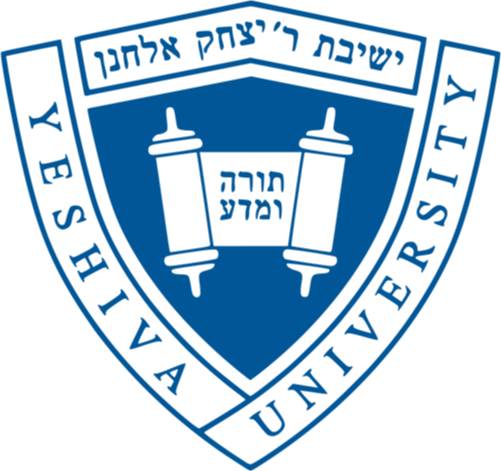
</div>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5002 Computational Statistics and Probability</h1>
<p>
<h2 style='text-align: center;'>Final Project</h1>
<h2 style='text-align: center;'>Analysis of World Population</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# <a name="Contents">Table of Contents</a>
- [1 Introduction](#Section-1)
<p>

- [2 Data Summary](#Section-2)
    - [2.1 Imports and Reading Data](#Section-21)
    - [2.2 Data Understanding](#Section-22)
<p>

- [3 Exploratory Data Analysis (EDA)](#Section-3)
    - [3.1 Summary Statistics for Each Attribute](#Section-31)
    - [3.2 Country Count for Individual Continents](#Section-32)
    - [3.3 Development of World Population Since 1970](#Section-33)
    - [3.4 Linear Regression of the World Population](#Section-34)
        - [3.4.1 Estimated Regression Line](#Section-341)
        - [3.4.2 Point Estimate of $\sigma$](#Section-342)
        - [3.4.3 Test of Hypothesis $H_0: \beta_1 = \beta_{1,0}$ vs. $H_a: \beta_1 \ne \beta_{1,0}$](#Section-343)
        - [3.4.4 95% CI for the Slope of the Regression Line](#Section-344)
        - [3.4.5 95% Prediction Interval for $population$, when $year = 2005$](#Section-345)
        - [3.4.6 95% Prediction Band](#Section-346)
        - [3.4.7 Coefficient of Determination](#Section-347)
    - [3.5 Population Development of Each Continents](#Section-35)
    - [3.6 Population Distribution in Each Years](#Section-36)
    - [3.7 Area Distribution on Each Continents](#Section-37)
<p>

- [4 Research Questions](#Section-4)
    - [4.1 Which twenty countries are most populous in the world?](#Section-41)
    - [4.2 Which twenty countries have the highest population growth?](#Section-42)
    - [4.3 What is the population growth or decline of the 20 most populous countries?](#Section-43)
    - [4.4 Which twenty countries have the highest population density?](#Section-44)
    - [4.5 Which country belongs to both lists of the twenty countries with the highest population growth and the highest population density?](#Section-45)
    - [4.6 What was the world's population growth rate in % since 1980?](#Section-46)
    - [4.7 Is this world's population growth increasing or decreasing over the years?](#Section-47)
    - [4.8 What world's population can be expected in 2050?](#Section-48)
        - [4.8.1 95% Prediction Interval](#Section-481)
<p>
    
- [5 Conclusion](#Section-5)
<p>

- [References](#Section-6)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <a name="Section-1">1 Introduction</a>
[top](#Contents)

For my project, I have chosen the data set of the world population, respectively the population of individual countries. This data set records the population of each country since 1970 until 2022 in the following distribution of years: 1970, 1980, 1990, 2000, 2010, 2015, 2020 and 2022. Furthermore, every record contains the following items: rank, country code (CCA3), country name, capital, continent, area, density, growth rate and world population percentage.
<p>
In my project, I will answer the following research questions:

- Which twenty countries are the most populous in the world?
- What is the population growth or decline of the 20 most populous countries?
- Which twenty countries have the highest population growth?
- Which twenty countries have the highest population density?
- Which country belongs to both lists of the twenty countries with the highest population growth and the highest population density?
- What was the world's population growth rate in % since 1980?
- Is this world's population growth increasing or decreasing over the years?
- What world's population can be expected in 2050?

# <a name="Section-2">2 Data Summary</a>
[top](#Contents)

#### My dataset was obtained from https://worldpopulationreview.com/

In [92]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t

pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")

## <a name="Section-21">2.1 Imports and Reading Data</a>

I uploaded the data set to my own repository on GitHub. It is publicly accessible online, so there is no danger that this data set will be deleted sometime during this project or shortly after it and there would be an inconsistency in the Jupyter notebook.

In [93]:
# The file path to my online AIM 5002 Github Repository with the "world_population.csv" file
filePath = r'https://raw.githubusercontent.com/rjholik/AIM-5002-Computational-Stats-Prob/main/Final_Project/world_population.csv'
df = pd.read_csv(filePath, encoding = 'unicode_escape', engine ='python')

In [94]:
df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,0.00


## <a name="Section-22">2.2 Data Understanding</a>

#### __The following quantities present the attributes of the given data set.__

In [95]:
# Dataframe shape
df.shape

(234, 16)

#### My data includes 234 use cases / records. This means that I have a record of 234 countries from around the world.
#### Each recod contains 17 attributes.

### Attribute names:

In [96]:
# Column names
print(*list(df.columns), sep=", ")

Rank, CCA3, Country/Territory, Capital, Continent, 2022 Population, 2020 Population, 2015 Population, 2010 Population, 2000 Population, 1990 Population, 1980 Population, 1970 Population, Area (km²), Density (per km²), World Population Percentage


### __Dataset Glossary (Column-Wise)__:
- Rank: Rank by Population.
- CCA3: 3 Digit Country/Territories Code.
- Country/Territories: Name of the Country/Territories.
- Capital: Name of the Capital.
- Continent: Name of the Continent.
- 2022 Population: Population of the Country/Territories in the year 2022.
- 2020 Population: Population of the Country/Territories in the year 2020.
- 2015 Population: Population of the Country/Territories in the year 2015.<p>
$\vdots$<br>
- 1970 Population: Population of the Country/Territories in the year 1970.
- Area (km²): Area size of the Country/Territories in square kilometer.
- Density (per km²): Population Density per square kilometer.
- World Population Percentage: The population percentage by each Country/Territories.

### __Renaming of columns with population__

#### __I rename the whole attribute board for easier work.__

In [97]:
# Renaming of columns with population
df.rename(columns = {'2022 Population':'2022', '2020 Population':'2020', '2015 Population':'2015',
                     '2010 Population':'2010', '2000 Population':'2000', '1990 Population':'1990',
                     '1980 Population':'1980', '1970 Population':'1970', 'Area (km²)' : 'Area_(km²)',
                     'Density (per km²)' : 'Density_(per_km²)',
                     'World Population Percentage' : 'World_Population_Percentage'
                    }, inplace = True)

### __Data types__

In [98]:
# Data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area_(km²)          

#### __The Dtype column in the above shows the data type for each of the column. "Object " Dtype is string, "int64" and "float64" are numeric.__

### __Checking for null values__

#### __It can be seen that the data set does not have a NAN value in any attribute.__

In [159]:
# Checking for null values
sum(df.isna().sum(axis=0))

0

### __Checking Duplicates__

#### __If there are duplicates, none of them appeared in the data.__

In [101]:
# Check if any duplicate appears
df.loc[df.duplicated()]

,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),World_Population_Percentage


In [102]:
subset = ['Rank','CCA3', 'Country/Territory', 'Capital']
for n in subset:
    print(f"{n} - Any duplicated value? {any(df.duplicated(subset=[n]))}")
    df.duplicated(subset=[n])

Rank - Any duplicated value? False
CCA3 - Any duplicated value? False
Country/Territory - Any duplicated value? False
Capital - Any duplicated value? False


### __Quick check of the dataset head__

In [147]:
df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),World_Population_Percentage,Population_Growth
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,0.52,2.766766
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.04,-0.427787
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,0.56,1.670315
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.00,-2.074087
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,0.00,1.366795


# <a name="Section-3">3 Exploratory Data Analysis (EDA)</a>
[top](#Contents)

#### __In this section, I provided summary statistics for each attribute within the data frame. Furthermore, I have provided appropriate graphical analysis for each attribute using basic Pandas graphics. I have also attached narratives of my EDA findings.__

## <a name="Section-31">3.1 Summary Statistics for Each Attribute</a>

In [104]:
# Summary statistics for each attribute
df.describe()

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),World_Population_Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,17.880000


## <a name="Section-32">3.2 Country Count for Individual Continents</a>

#### __The data below shows the number of countries in each continent in our data. Africa clearly has the most land in the world.__

In [105]:
df["Continent"].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

<AxesSubplot: >

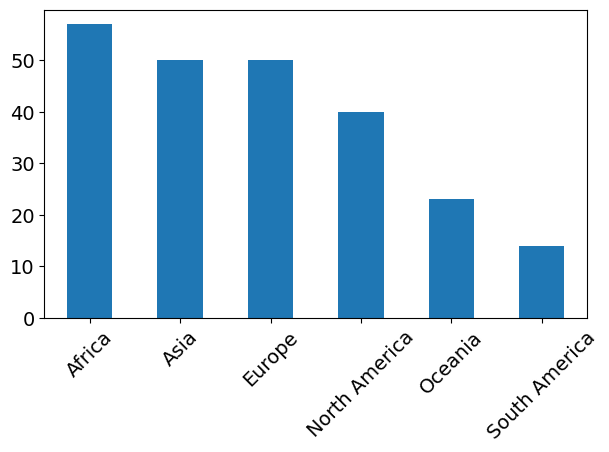

In [106]:
### Plots
df["Continent"].value_counts().plot(kind='bar', fontsize=14, rot=45, figsize=(7,4))

## <a name="Section-33">3.3 Development of World Population Since 1970</a>

#### __The given graph shows the development of the world's population from 1970 to 2022.__

In [107]:
years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
populationWorld = list(df[['1970', '1980', '1990', '2000','2010','2015','2020','2022']].sum())

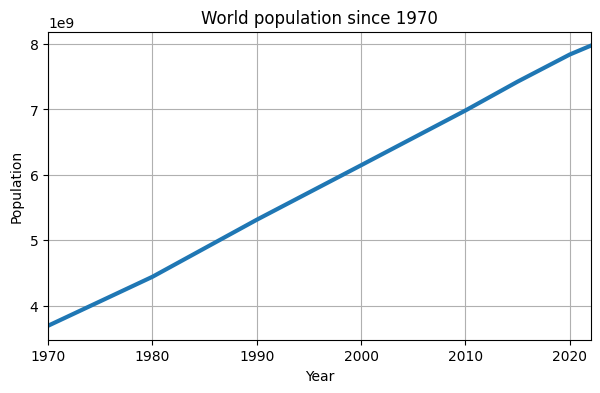

In [108]:
# Plot   
plt.figure(figsize = (7, 4))
plt.plot(years, populationWorld, lw = 3)
plt.title("World population since 1970")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xlim(1970, 2022)
# plt.ylim(0, 9e9)
plt.grid()
plt.show()

In [109]:
print(f"World population in 1970 : {df['1970'].sum():,}")
print(f"World population in 2022 : {df['2022'].sum():,}")
print(f"The world population is larger in 2022 than in 1970 : : {np.round(df['2022'].sum()/df['1970'].sum(), 6)} times more.")

World population in 1970 : 3,694,136,661
World population in 2022 : 7,973,413,042
The world population is larger in 2022 than in 1970 : : 2.158397 times more.


#### __From the above data, it follows that the world population has more than doubled from 1970 to 2022.__

## <a name="Section-34">3.4 Linear Regression of the World Population</a>

### <a name="Section-341">3.4.1 Estimated Regression Line</a>

In [110]:
x0 = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
y0 = list(df[['1970','1980','1990','2000','2010','2015','2020','2022']].sum().to_numpy())
n = len(x0)

In [111]:
meanX = np.mean(x0)
meanY = np.mean(y0)
Sxy = (x0 - meanX).T @ (y0 - meanY) 
Sxx = (x0 - meanX).T @ (x0 - meanX)

b1 = Sxy / Sxx
b0 = meanY - b1 * meanX
parameters = np.array([[b0],[b1]])
print(f"^β₀ = {b0:,}, ^β₁ = {b1:,}")
print(f"^y = {b0:,} + {b1:,} x")

# x̄ 
xBar = np.array([[b0],[b1]])

^β₀ = -160,587,659,522.29346, ^β₁ = 83,371,045.10416366
^y = -160,587,659,522.29346 + 83,371,045.10416366 x


#### <center>$$\hat{\beta}_0 = -160,587,659,522.29346 \text{   } \hat{\beta}_1 = 83,371,045.10416366$$</center>

##### <center>$$\widehat{\text{population}} = -160,587,659,522.29346 + 83,371,045.10416366 \cdot \text{year}  $$</center>

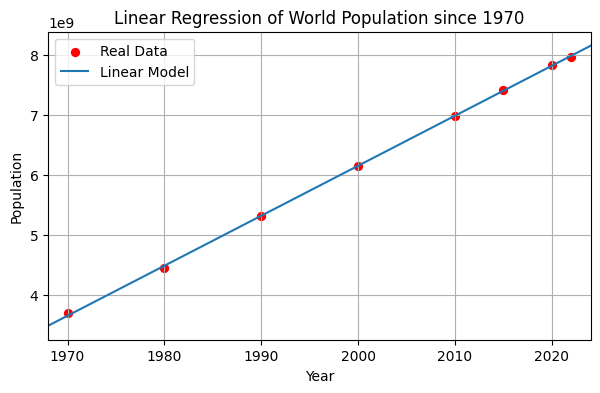

In [112]:
z = np.linspace(1968.0, 2024.0, num=1000)
y = []

# Obtaining data for a polynomial of the 1st order
for i in range(len(z)):
    value = np.float(np.array([[1, z[i]]]) @ xBar)
    y.append(value)

# Plot   
plt.figure(figsize = (7, 4))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(z, y)
plt.legend(["Real Data","Linear Model"])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression of World Population since 1970')
plt.xlim(1968, 2024)
# plt.ylim(0, 9e9)
plt.grid()
plt.show()

#### __Estimation that the expected increase in population associated with one year increase is 83,371,045.10416366.__

### <a name="Section-342">3.4.2 Point Estimate of σ</a>

In [113]:
x0 = np.array(x0, dtype = float)
y0 = np.array(y0, dtype = float)

In [114]:
dof = n - 2
SSE = (y0 - (b0 + b1 * x0)).T @ (y0 - (b0 + b1 * x0))
s2 = SSE / dof
s = np.sqrt(s2)

print(f"SSE = {SSE:,}")
print(f"^σ² = {s2:,}")
print(f"^σ = {s:,}")

SSE = 4,699,423,832,393,367.0
^σ² = 783,237,305,398,894.5
^σ = 27,986,377.13958158


#### <center>$$ \hat{\sigma} = \sqrt{\frac{SSE}{n - 2}} = 27,986,377.13958158$$</center>

#### __This roughly represents the size of a typical deviation from the estimated regression line.__

### <a name="Section-343">3.4.3 Test of Hypothesis H₀: β₁ = β₁,₀ vs. Ha: β₁ ≠ β₁,₀</a>

$$
\beta_{1,0} = 83,371,045 \text{ at } \alpha = 0.05
$$

In [115]:
beta_10 = 85000000
alpha = 0.05
alphaHalf = alpha/2

# Test statistic:
T = (b1 - beta_10) / (s / np.sqrt(Sxx))
t_alphahalf_n_minus_2 = t.ppf(1 - alphaHalf, dof)

print(f"t = {T:,}")
print(f"t_(α/2, n - 2) = t_({alphaHalf},{dof}) = {t_alphahalf_n_minus_2}")

# Rejection region
if np.abs(T) > t_alphahalf_n_minus_2:
    print("Reject H₀")
else:
    print("Fail to reject H₀")


t = -2.9695389975786664
t_(α/2, n - 2) = t_(0.025,6) = 2.4469118487916806
Reject H₀


#### __The value $t$ does fall in the rejection region (that is, $t = |-2.9695|$ is more than 2.4469); hence, the null hypothesis is rejected at the $\alpha = 0.05$ level of significance.__

### <a name="Section-344">3.4.4 95% CI for the Slope of the Regression Line</a>

In [116]:
alpha = 0.05
alphaHalf = alpha/2

SSxx = x0.T @ x0  - np.sum(x0)**2 /n
# the standard error of the slope of the given data
SE_Beta1 = np.sqrt(s2 / SSxx)
t_alphahalf_n_minus_2 = t.ppf(1 - alphaHalf, dof)

print(f"SE(^β₁) = {SE_Beta1:,}")
print(f"t_(α/2, n - 2) = t_({alphaHalf},{dof}) = {t_alphahalf_n_minus_2}")

print(f"CI_95% = ({b1 - t_alphahalf_n_minus_2 * SE_Beta1:,}; {b1 + t_alphahalf_n_minus_2 * SE_Beta1:,})")

SE(^β₁) = 548,554.8083943577
t_(α/2, n - 2) = t_(0.025,6) = 2.4469118487916806
CI_95% = (82,028,779.84379186; 84,713,310.36453547)


#### <center>$$CI_{95\%} = \hat{\beta}_1 \pm t_{\frac{\alpha}{2},(n-2)} SE(\hat{\beta}_1) = 83371045.104 \pm 2.44691 \times 548,554.808   $$</center>

#### <center>$$CI_{95\%}=(82,028,779.84379186; 84,713,310.36453547)$$</center>

### <a name="Section-345">3.4.5 95% Prediction Interval for population, when year = 2005</a>

In [169]:
yearStar = 2005

expected_y = np.float(np.array([[1, yearStar]]) @ parameters)

Sxx = x0.T @ x0 - n * meanX**2
squareRoot = np.sqrt(1 + 1/n + (yearStar - meanX)**2 / Sxx )

print(f"^y({yearStar}) = {expected_y:,}")
print(f"x̄ = {meanX:,}")
print(f"√(1 + 1/n + (x* - x̄)² / Sxx) = {squareRoot}")
print(f"PI_95% = ({expected_y - t_alphahalf_n_minus_2 * s * squareRoot:,}; {expected_y + t_alphahalf_n_minus_2 * s * squareRoot:,})")

^y(2005) = 6,571,285,911.5546875
x̄ = 2,000.875
√(1 + 1/n + (x* - x̄)² / Sxx) = 1.224745160548786
PI_95% = (6,487,415,120.671917; 6,655,156,702.437458)


#### <center>$$\widehat{\text{population}(2005)} = 6,571,285,911.5546875   $$</center>

#### <center>$$PI_{95\%} = (\hat{\beta}_0 + \hat{\beta}_1 x^* ) \pm t_{\frac{\alpha}{2},(n-2)} \hat{\sigma} \sqrt{1 + \frac{1}{n} + \frac{(x^* - \bar{x})^2}{Sxx}} = 6,571,285,911.555 \pm 2.44691 \times 27,986,377.1396 \times 1.0637   $$</center>

#### <center>$$PI_{95\%}=(6,498,440,964.406624; 6,644,130,858.702751)$$</center>

### <a name="Section-346">3.4.6 95% Prediction Band</a>

#### __The prediction bands for the prediction of an actual $Population$ for each setting of $Year$.__

In [118]:
def confInterval(xStar, n, meanX, s, Sxx, parameters, t_alphahalf_n_minus_2):
    expected_y = np.float(np.array([[1, xStar]]) @ parameters)
    squareRoot = np.sqrt(1 + 1/n + (xStar - meanX)**2 / Sxx)
    yLower = expected_y - t_alphahalf_n_minus_2 * s * squareRoot
    yUpper = expected_y + t_alphahalf_n_minus_2 * s * squareRoot

    return yLower, yUpper

In [119]:
z = np.linspace(1968.0, 2024.0, num=1000)
yLower, yUpper = [], []
y = []

# Obtaining data for a polynomial of the 1st order
for i in z:
    value1, value2  = confInterval(i, n, meanX, s, Sxx, parameters, t_alphahalf_n_minus_2)
    yLower.append(value1)
    yUpper.append(value2)
    value = np.float(np.array([[1, i]]) @ xBar)
    y.append(value)

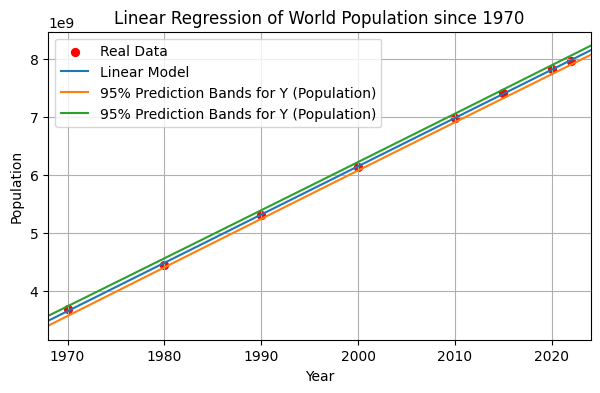

In [120]:
# Plot   
plt.figure(figsize = (7, 4))
plt.scatter(x0, y0, s=32, c='r', label = "Real Data")
plt.plot(z, y, label = "Linear Model")
plt.plot(z, yLower, label = "95% Prediction Bands for Y (Population)")
plt.plot(z, yUpper, label = "95% Prediction Bands for Y (Population)")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression of World Population since 1970')
plt.xlim(1968, 2024)
# plt.ylim(0, 9e9)
plt.grid()
plt.show()

### <a name="Section-347">3.4.7 Coefficient of Determination</a>

In [121]:
SST = (y0 - meanY).T @ (y0 - meanY)
print(f"r² = {1 - SSE/SST}")

r² = 0.9997403143109639


#### <center>$$ r^2 = 1 - \frac{SSE}{SST} = 0.9997403143109639$$ </center>

#### __r² can be interpreted as the proportion of the total variation in the $y_i$’s that is explained by the variable $x$ in a simple linear regression model.__

## <a name="Section-34">3.4 Population Development of Each Continents</a>

In [122]:
populationContinent = []
for c in range(0, 6):
    populationContinent.append(list(df[['Continent','1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022'
    ]].groupby(['Continent']).sum().T.iloc[:, c]))



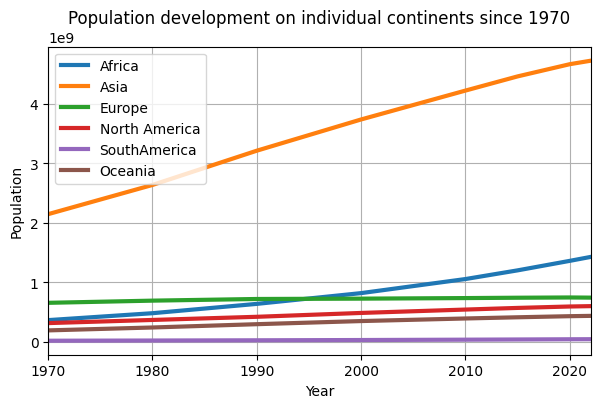

In [123]:
# Plot   
plt.figure(figsize = (7, 4))
for c in range(0, 6):
    plt.plot(years, populationContinent[c], lw = 3)
plt.title("Population development on individual continents since 1970")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(['Africa','Asia','Europe','North America','SouthAmerica','Oceania'])
plt.xlim(1970, 2022)
plt.grid()
plt.show()

#### **The given graph shows the development of the population on individual continents since 1970. You may see the population explosion in Asia and Africa. On the contrary, the population in Europe, North America, South America, and Oceania has a gradual increase or even stagnation.**

<AxesSubplot: title={'center': 'Population on individual continents in 2022'}, xlabel='Continent'>

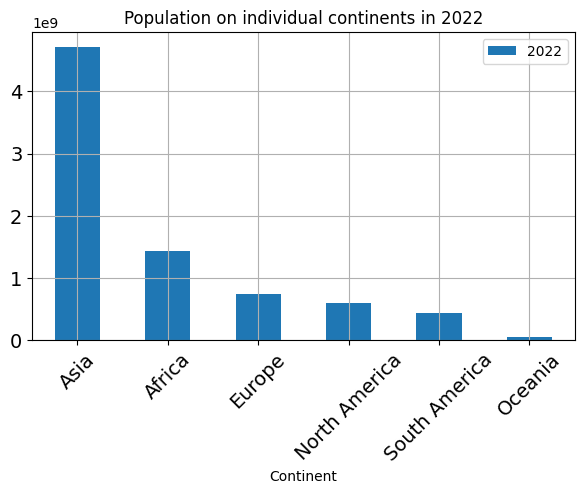

In [124]:
# Bar plots
df[['Continent','2022']].groupby(['Continent']).sum().sort_values(by=['2022'], ascending=False).plot(kind='bar', fontsize=14, title ="Population on individual continents in 2022", rot=45, grid=True, lw=3, figsize=(7, 4))

In [125]:
df[['Continent','2022']].groupby(['Continent']).sum().sort_values(by=['2022'], ascending=False)

,2022
Continent,
Asia,4721383274
Africa,1426730932
Europe,743147538
North America,600296136
South America,436816608
Oceania,45038554


#### __From the graph and table above, it is evident that Asia with 4.7 billion inhabitants is the most numerous continent, followed by Africa with 1.42 billion inhabitants.__

## <a name="Section-35">3.5 Population Distribution in Each Years</a>

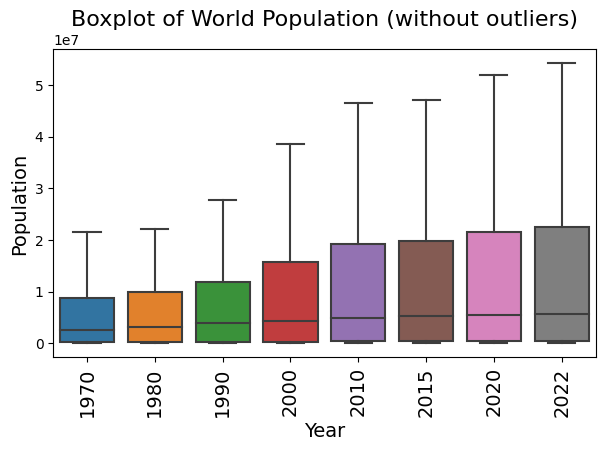

In [126]:
# Boxplots
plt.figure(figsize = (7, 4))
sns.boxplot(data = df[["1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022"]], showfliers = False)
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title(f"Boxplot of World Population (without outliers)", fontsize = 16)
plt.show()

#### __Above boxplots with the population of all countries for individual years are shown below.__

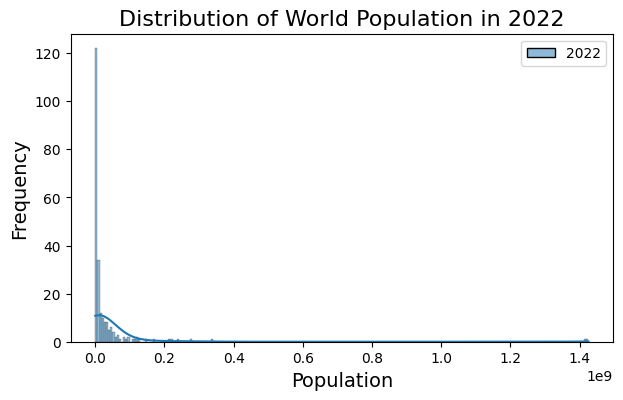

In [127]:
plt.figure(figsize = (7, 4))
sns.histplot(data = df[["2022"]], bins = 230, kde = True)
plt.title(f"Distribution of World Population in 2022", fontsize = 16)
plt.xlabel("Population", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

In [165]:
df[['2022']].mean()

2022    3.407441e+07
dtype: float64

In [129]:
df['2022'].max()

1425887337

#### __The distribution of world population between individual countries in 2022 is right skewed. The mean is 34,074,410 and the maximum is 1,425,887,337.__

## <a name="Section-36">3.6 Area Distribution on Each Continents</a>

<AxesSubplot: title={'center': 'Area of individual continents'}, xlabel='Continent'>

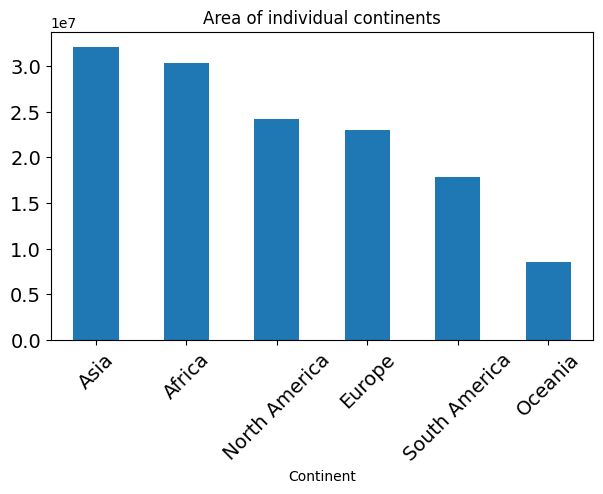

In [130]:
df.groupby(["Continent"])["Area_(km²)"].sum().sort_values(ascending=False).plot(kind='bar', fontsize=14, title="Area of individual continents", rot=45, figsize=(7, 4))

#### **The graph above shows the area in $km^2$ for each of the continent.**

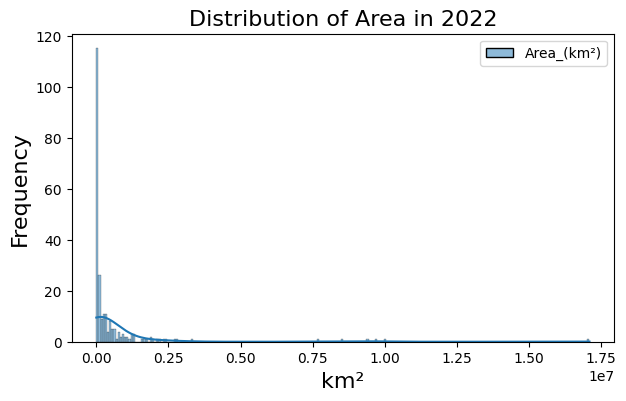

In [160]:
plt.figure(figsize = (7, 4))
sns.histplot(data = df[["Area_(km²)"]], bins = 230, kde = True)
plt.title(f"Distribution of Area in 2022", fontsize = 16)
plt.xlabel("km²", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show()

In [161]:
df[["Area_(km²)"]].mean()

Area_(km²)    581449.384615
dtype: float64

In [162]:
df[["Area_(km²)"]].max()

Area_(km²)    17098242
dtype: int64

#### __The distribution of area between individual countries is right skewed. The mean is 581,449 $km^2$ and the maximum is 17,098,242 $km^2$.__

# <a name="Section-4">4 Research Questions</a>
[top](#Contents)

## <a name="Section-41">4.1 Which twenty countries are most populous in the world?</a>

#### __The following is a list of the twenty most populous countries in the world. The first three places are China, India, and the USA. From the given data, it can also be deduced that China and India have "very" close numbers, while the USA is far from them.__

In [151]:
data0 = df.sort_values(by="2022",ascending=False)[["Country/Territory","2022"]].reset_index().drop("index",axis=1).head(20)
data0

,Country/Territory,2022
0,China,1425887337
1,India,1417173173
2,United States,338289857
3,Indonesia,275501339
4,Pakistan,235824862
5,Nigeria,218541212
6,Brazil,215313498
7,Bangladesh,171186372
8,Russia,144713314
9,Mexico,127504125


<AxesSubplot: title={'center': 'The twenty most populous countries in the world in 2022'}, xlabel='Country/Territory'>

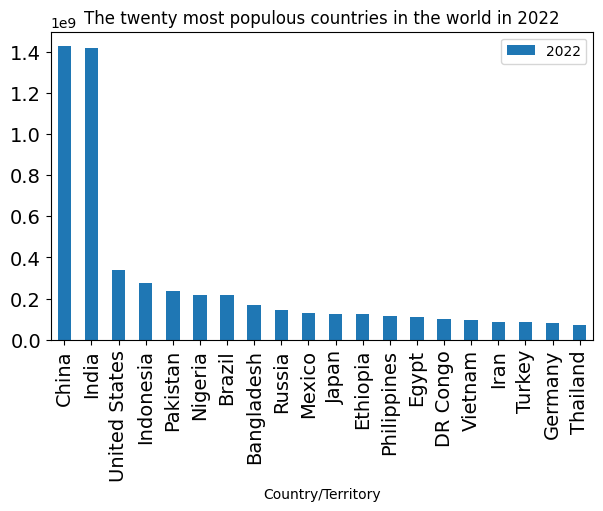

In [157]:
data0.plot(x = 'Country/Territory', y = '2022', kind="bar", fontsize=14, title="The twenty most populous countries in the world in 2022", rot=90, figsize=(7, 4))

## <a name="Section-42">4.2 Which twenty countries have the highest population growth?</a>

In [134]:
# Calculating population growth
df["Population_Growth"] = 0.5*(df["2022"]/df["2020"] - 1)*100
data1 = df[["Country/Territory","Population_Growth"]].sort_values(by = "Population_Growth", ascending = False).head(20).reset_index().drop("index", axis = 1)
data1

,Country/Territory,Population_Growth
0,Niger,3.851331
1,Mayotte,3.356491
2,DR Congo,3.315476
3,Syria,3.255862
4,Chad,3.240112
5,Angola,3.231528
6,Mali,3.226412
7,Somalia,3.206428
8,Uganda,3.203467
9,Tanzania,3.073705


<AxesSubplot: title={'center': 'The twenty countries with the highest relative population growth in 2022'}, xlabel='Country/Territory'>

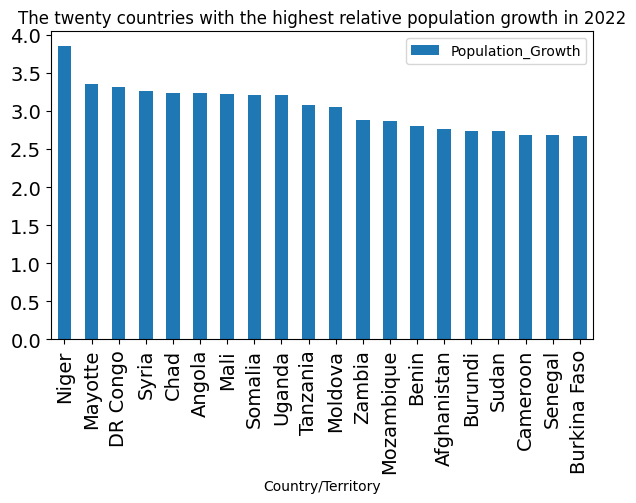

In [167]:
data1.plot(x = 'Country/Territory', y = 'Population_Growth', kind="bar", fontsize=14, title="The twenty countries with the highest relative population growth in 2022", figsize=(7, 4))

#### __From the table above, it is evident that out of the 20 countries having the highest population growth, Niger, Mayotte, and DR Congo are countries with the highest population growth rate in the world.__

## <a name="Section-43">4.3 What is the population growth or decline of the 20 most populous countries?</a>

In [136]:
# Calculating growth/decline rate
data2 = df[["Country/Territory","2022","Population_Growth"]].sort_values(by = "2022", ascending = False).head(20).sort_values(by='Population_Growth', ascending = False).reset_index().drop("index", axis = 1)
data2

,Country/Territory,2022,Population_Growth
0,DR Congo,99010212,3.315476
1,Ethiopia,123379924,2.640569
2,Nigeria,218541212,2.451383
3,Pakistan,235824862,1.898821
4,Egypt,110990103,1.640052
5,Philippines,115559009,1.501026
6,Bangladesh,171186372,1.124537
7,Vietnam,98186856,0.795754
8,India,1417173173,0.744279
9,Iran,88550570,0.721947


<AxesSubplot: title={'center': 'Population Growth Rate 2022'}, xlabel='Country/Territory'>

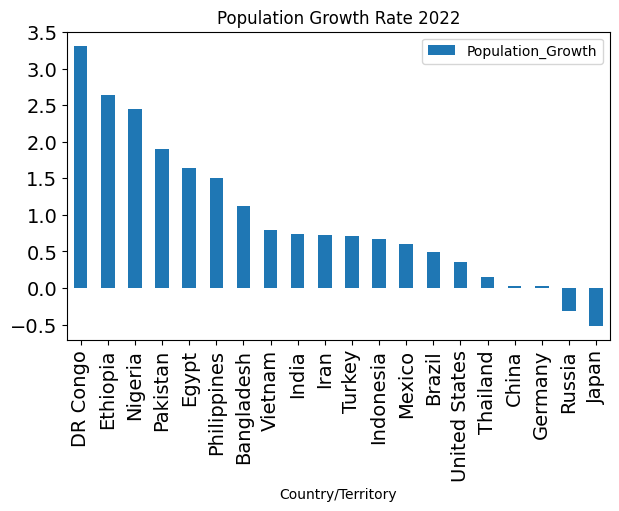

In [137]:
data2.plot(x = 'Country/Territory', y = 'Population_Growth', kind="bar", title = 'Population Growth Rate 2022',fontsize=14, figsize=(7, 4))

#### __It can be seen from the table above that although China has the highest population in the world in 2022, DR Congo has the highest growth rate. These two countries belong to the group of twenty most populous countries in the world. There are countries like Russia and Japan that have negative population growth and are also among the twenty most populous countries.__

## <a name="Section-44">4.4 Which twenty countries have the highest population density?</a>

#### __The following data shows the countries with highest population density.__

In [138]:
# Calclating population density in 2022
data3 = df[["Country/Territory","Density_(per_km²)"]].sort_values(by="Density_(per_km²)",ascending=False).reset_index().drop("index",axis=1).head(20)
data3

,Country/Territory,Density_(per_km²)
0,Macau,23172.2667
1,Monaco,18234.5000
2,Singapore,8416.4634
3,Hong Kong,6783.3922
4,Gibraltar,5441.5000
5,Bahrain,1924.4876
6,Maldives,1745.9567
7,Malta,1687.6139
8,Sint Maarten,1299.2647
9,Bermuda,1188.5926


<AxesSubplot: title={'center': 'Population density 2022'}, xlabel='Country/Territory'>

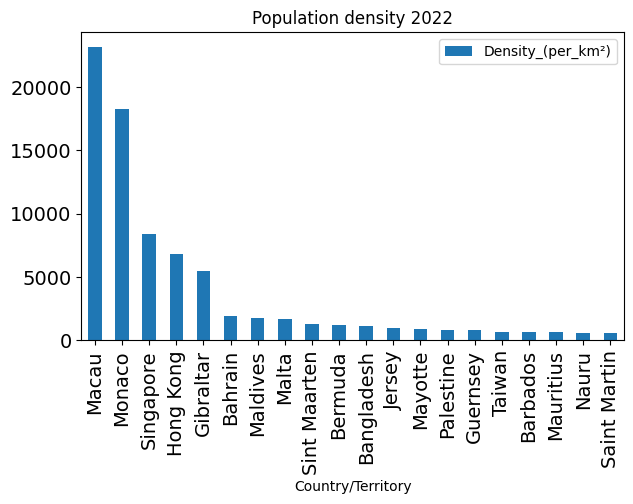

In [139]:
data3.plot(x = 'Country/Territory', y = 'Density_(per_km²)', kind="bar", title = 'Population density 2022',fontsize=14, figsize=(7, 4))

## <a name="Section-45">4.5 Which country belongs to both lists of the twenty countries with the highest population growth and the highest population density?</a>

In [140]:
pd.merge(data1, data3, how='inner', on=['Country/Territory'])

,Country/Territory,Population_Growth,Density_(per_km²)
0,Mayotte,3.356491,871.9278


## <a name="Section-46">4.6 What was the world's population growth rate in % every year since 1980?</a>

#### __The data below shows the long-term downward trend in world population growth since 1980.__

In [141]:
data4 = pd.DataFrame(df[["1970","1980","1990","2000","2010","2015","2020","2022"]].sum(axis=0)).reset_index().rename(columns = {'index':'Year', 0:'World_population'})
data4['Year'] = data4['Year'].astype('int')
data4["Growth_rate_in%"] = 0.0

In [142]:
for i in range(1,len(data4)):
    n = data4["Year"][i] - data4["Year"][i-1]
    data4["Growth_rate_in%"][i] = ((data4["World_population"][i] / data4["World_population"][i-1])**(1/n) - 1)*100

In [143]:
data4

,Year,World_population,Growth_rate_in%
0,1970,3694136661,0.000000
1,1980,4442400371,1.861595
2,1990,5314191665,1.808011
3,2000,6147055703,1.466573
4,2010,6983784998,1.284356
5,2015,7424809761,1.232251
6,2020,7839250603,1.092246
7,2022,7973413042,0.852079


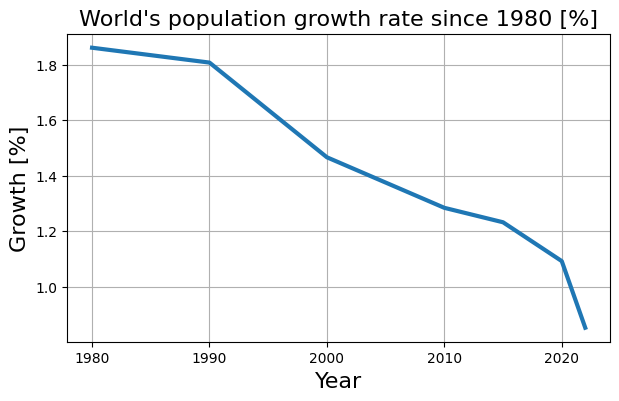

In [144]:
year = []
growth = []
for i in range(1,len(data4)):
    year.append(data4["Year"][i])
    growth.append(data4["Growth_rate_in%"][i])

# Plot
plt.figure(figsize = (7, 4))
plt.plot(year, growth, lw = 3)
plt.title("World's population growth rate since 1980 [%]",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Growth [%]",fontsize=16)
plt.grid()
plt.show()

## <a name="Section-47">4.7 Is this world's population growth increasing or decreasing over the years?</a>

In [145]:
data4[data4["Year"] == data4["Year"].max()]

,Year,World_population,Growth_rate_in%
7,2022,7973413042,0.852079


#### __The graph above of the world population growth rate clearly shows that this rate generally decreases. This rate dropped to 0.85% in 2022.__

## <a name="Section-48">4.8 What world's population can be expected in 2050?</a>

#### __I will simplify the whole situation by using a linear regression model, i.e. I will do extrapolation. This can be quite problematic, but for simplicity, this model will suffice.__

#### __I like the following explanation why extrapolation is "dangerous":__

__"Our explanation for what happened in the past quickly becomes our prediction for the future.  This is dangerous because we cannot accurately explain the past let alone predict the future.  Even in the event that we are correct in our diagnosis of the drivers of previous returns; it is unlikely that they will persist unchecked." (Why is Extrapolation so Dangerous for Investors?, www.behaviouralinvestment.com)__


In [152]:
print(f"Prediction of the world population in 2050 is {np.round(np.float(np.array([[1, 2050]]) @ parameters),-6):,}.")

Prediction of the world population in 2050 is 10,323,000,000.0.


#### __Based on a linear regression model, the world population is predicted to be "approximately" 10,323,000,000 in 2050.__

### <a name="Section-481">4.8.1 95% Prediction Interval</a>

In [168]:
yearStar = 2050

expected_y = np.float(np.array([[1, yearStar]]) @ parameters)

Sxx = x0.T @ x0 - n * meanX**2
squareRoot = np.sqrt(1 + 1/n + (yearStar - meanX)**2 / Sxx )

print(f"^y({yearStar}) = {expected_y:,}")
print(f"x̄ = {meanX:,}")
print(f"√(1 + 1/n + (x* - x̄)² / Sxx) = {squareRoot}")
print(f"PI_95% = ({expected_y - t_alphahalf_n_minus_2 * s * squareRoot:,}; {expected_y + t_alphahalf_n_minus_2 * s * squareRoot:,})")

^y(2050) = 10,322,982,941.242035
x̄ = 2,000.875
√(1 + 1/n + (x* - x̄)² / Sxx) = 1.2247858808475147
PI_95% = (10,239,109,361.825151; 10,406,856,520.658918)


#### <center>$$\widehat{\text{population}(2050)} = 10,322,982,941.242035   $$</center>

#### <center>$$PI_{95\%} = (\hat{\beta}_0 + \hat{\beta}_1 x^* ) \pm t_{\frac{\alpha}{2},(n-2)} \hat{\sigma} \sqrt{1 + \frac{1}{n} + \frac{(x^* - \bar{x})^2}{Sxx}} = 10,322,982,941.242035 \pm 2.44691 \times 27,986,377.1396 \times 1.0637   $$</center>

#### <center>$$PI_{95\%}=(10,239,109,361.825151; 10,406,856,520.658918)$$</center>

<br>
<br>
<br>
<br>
<br>

# <a name="Section-5">5 Conclusion</a>
[top](#Contents)

The findings from the data analysis in this project present that the world's population is growing approximately linearly. Asia and Africa account for the largest share of the world's population. In Asia, China, India, and Indonesia have the largest population, and in Africa, Nigeria, Ethiopia, and Egypt. The greatest relative population growth rate is in Niger, Mayotte, and the Democratic Republic of the Congo. Of the twenty most populous countries, the Democratic Republic of the Congo, Nigeria, and Ethiopia, which are located in Africa, have the largest population growth rate. On the other hand, countries such as Russia, and Japan have negative population growth rate, so their population will decrease. This may be a problem namely in Japan due to its population aging very fast. A country like Mayotte has a high population density with one of the fastest-growing populations in the world. This combination can bring potentially big problems to this country. Another insight is that the world population growth rate has generally decreased since 1980 to the level of 0.85% in 2022. The linear regression model predicts a possible population of 10,323,000,000 people in 2050. This must not be taken seriously, as it is an extrapolation and, as stated in the text, this is always problematic. This work also contains a whole range of statistical indicators, including standard deviation, regression model, confidence intervals, prediction intervals, etc.

# <a name="Section-6">References</a>
[top](#Contents)

- Mathematical Statistics with Applications 7th Edition, by Dennis Wackerly , William Mendenhall, Richard L. Scheaffer, 2008

<p>

- Probability and Statistics for Engineering and the Sciences 8th Edition, Jay Devore, 2011

<p>

- In-place sort_values in pandas what does it exactly mean?, https://stackoverflow.com/questions/41776801/in-place-sort-values-in-pandas-what-does-it-exactly-mean

<p>

- Finding common rows (intersection) in two Pandas dataframes, https://stackoverflow.com/questions/19618912/finding-common-rows-intersection-in-two-pandas-dataframes

<p>

- Why is Extrapolation so Dangerous for Investors?, https://behaviouralinvestment.com/2020/06/03/why-is-extrapolation-so-dangerous-for-investors/